In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
torch.manual_seed(0)

N_SAMPLES = 20
N_HIDDEN = 300

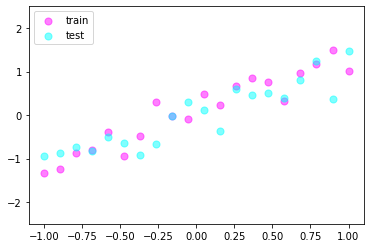

In [43]:
# training data
x = torch.unsqueeze(torch.linspace(-1, 1, N_SAMPLES), 1)
y = x + 0.3 * torch.normal(torch.zeros(N_SAMPLES, 1), torch.ones(N_SAMPLES, 1))

# test data
test_x = torch.unsqueeze(torch.linspace(-1, 1, N_SAMPLES), 1)
test_y = text_x + 0.3 * torch.normal(torch.zeros(N_SAMPLES, 1), torch.ones(N_SAMPLES, 1))

# show data
plt.scatter(x.data.numpy(), y.data.numpy(), c='magenta', s=50, alpha=0.5, label='train')
plt.scatter(text_x.data.numpy(), text_y.data.numpy(), c='cyan', s=50, alpha=0.5, label='test')
plt.ylim(-2.5, 2.5)
plt.legend(loc='upper left')
plt.show()

In [44]:
net_overfitting = torch.nn.Sequential(
    torch.nn.Linear(1, N_HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, N_HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, 1),
)

net_dropped = torch.nn.Sequential(
    torch.nn.Linear(1, N_HIDDEN),
    torch.nn.Dropout(0.5),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, N_HIDDEN),
    torch.nn.Dropout(0.5),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, 1),
)

print(net_overfitting)
print(net_dropped)

Sequential(
  (0): Linear(in_features=1, out_features=300, bias=True)
  (1): ReLU()
  (2): Linear(in_features=300, out_features=300, bias=True)
  (3): ReLU()
  (4): Linear(in_features=300, out_features=1, bias=True)
)
Sequential(
  (0): Linear(in_features=1, out_features=300, bias=True)
  (1): Dropout(p=0.5, inplace=False)
  (2): ReLU()
  (3): Linear(in_features=300, out_features=300, bias=True)
  (4): Dropout(p=0.5, inplace=False)
  (5): ReLU()
  (6): Linear(in_features=300, out_features=1, bias=True)
)


In [45]:
optimizer_ofit = torch.optim.Adam(net_overfitting.parameters(), lr=0.1)
optimizer_drop = torch.optim.Adam(net_dropped.parameters(), lr=0.1)
loss_func = torch.nn.MSELoss()

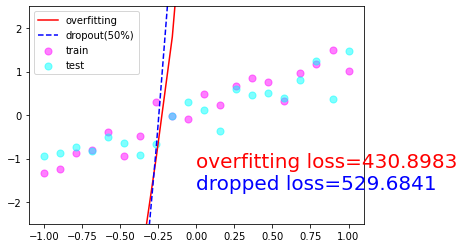

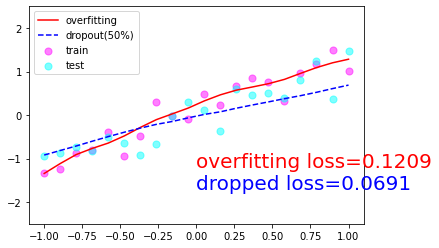

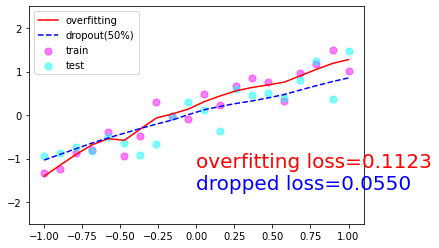

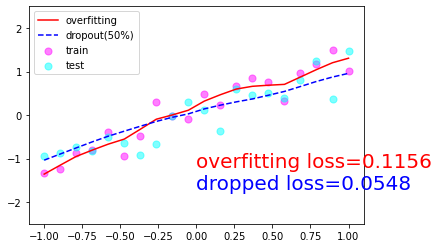

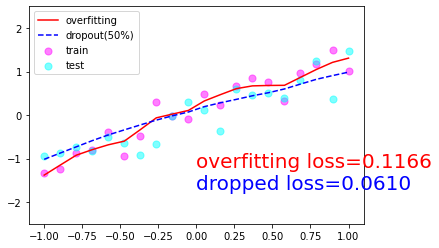

In [46]:
for t in range(500):
    # training
    pred_ofit = net_overfitting(x)
    pred_drop = net_dropped(x)
    loss_ofit = loss_func(pred_ofit, y)
    loss_drop = loss_func(pred_drop, y)
    
    optimizer_ofit.zero_grad()
    optimizer_drop.zero_grad()
    loss_ofit.backward()
    loss_drop.backward()
    optimizer_ofit.step()
    optimizer_drop.step()
    
    if t % 100 == 0:
        # undet predicting mode, need to close the dropout function
        net_overfitting.eval()
        net_dropped.eval()
        
        test_pred_ofit = net_overfitting(test_x)
        test_pred_drop = net_dropped(test_x)

        plt.scatter(x.data.numpy(), y.data.numpy(), c='magenta', s=50, alpha=0.5, label='train')
        plt.scatter(text_x.data.numpy(), text_y.data.numpy(), c='cyan', s=50, alpha=0.5, label='test')
        plt.plot(test_x.data.numpy(), test_pred_ofit.data.numpy(), 'r-', label='overfitting')
        plt.plot(test_x.data.numpy(), test_pred_drop.data.numpy(), 'b--', label='dropout(50%)')
        plt.text(0, -1.2, f'overfitting loss={loss_func(test_pred_ofit, test_y):.4f}',
                 fontdict={'size': 20, 'color': 'red'})
        plt.text(0, -1.7, f'dropped loss={loss_func(test_pred_drop, test_y):.4f}',
                 fontdict={'size': 20, 'color': 'blue'})
        plt.ylim(-2.5, 2.5)
        plt.legend(loc='upper left')
        plt.pause(0.1)
        plt.show()
        
        # set back to training mode
        net_overfitting.train()
        net_dropped.train()
    